In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("CE802_Ass_2019_Data.csv")
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,0,0,16,2.02,0.52,-2.35,-1.98,-0.70,85,6,-2.07,-0.07,1.08,15,-0.63,-3.49,-1.68,0.02,15.3,NaN,True
1,0,0,86,-0.90,2.75,0.14,0.83,-0.06,107,1,-0.86,0.17,1.06,-8,-1.21,0.34,0.36,0.61,10.1,NaN,True
2,1,1,165,0.73,1.05,0.10,2.57,-1.65,41,5,0.08,0.04,0.42,-6,-0.46,-0.62,1.67,2.60,11.0,1.55,False
3,1,1,191,-1.50,0.79,0.33,1.24,1.35,17,2,-0.85,1.74,1.74,15,0.47,0.63,0.08,0.19,6.3,0.95,False
4,1,1,13,0.25,-1.19,-0.90,2.67,0.22,12,8,0.68,-0.39,1.25,25,-0.09,-2.41,-0.53,-0.77,10.5,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,1,138,1.36,0.40,1.05,4.00,0.87,36,16,0.27,-0.93,0.70,23,0.23,-1.24,-0.65,1.26,20.9,2.87,True
496,0,0,102,2.06,0.09,0.84,3.63,1.22,57,-2,-0.32,-0.38,0.56,-6,-0.08,-1.29,-0.03,0.47,19.6,1.83,False
497,1,0,211,0.18,1.71,0.30,1.22,1.16,47,-49,-0.21,-0.77,0.78,7,-0.27,-0.45,-0.89,0.00,5.9,-1.03,False
498,1,0,94,-0.86,1.06,0.66,1.25,1.25,23,5,-0.10,0.68,0.11,-8,0.42,1.58,-0.79,-1.20,6.4,NaN,True


In [2]:
df = data.drop(labels=['F20', 'Class'], axis=1) # Drop dependent variable ('Class') and missing_value feature ('F20').
df.shape  # Shape of the dataset.

(500, 19)

# **Feature Selection with Correlation.**

**Correlation is a measure of the linear relationship of two or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good quality features are highly correlated with the target. Furthermore, independent features should be correlated with the target but should be uncorrelated among themselves.**

*If two features are correlated, we can predict one from the other. Therefore, if two independent features are correlated among themselves, the model only really needs one of them, as the second feature does not add additional information. Hence, use the **Pearson Correlation** here.*

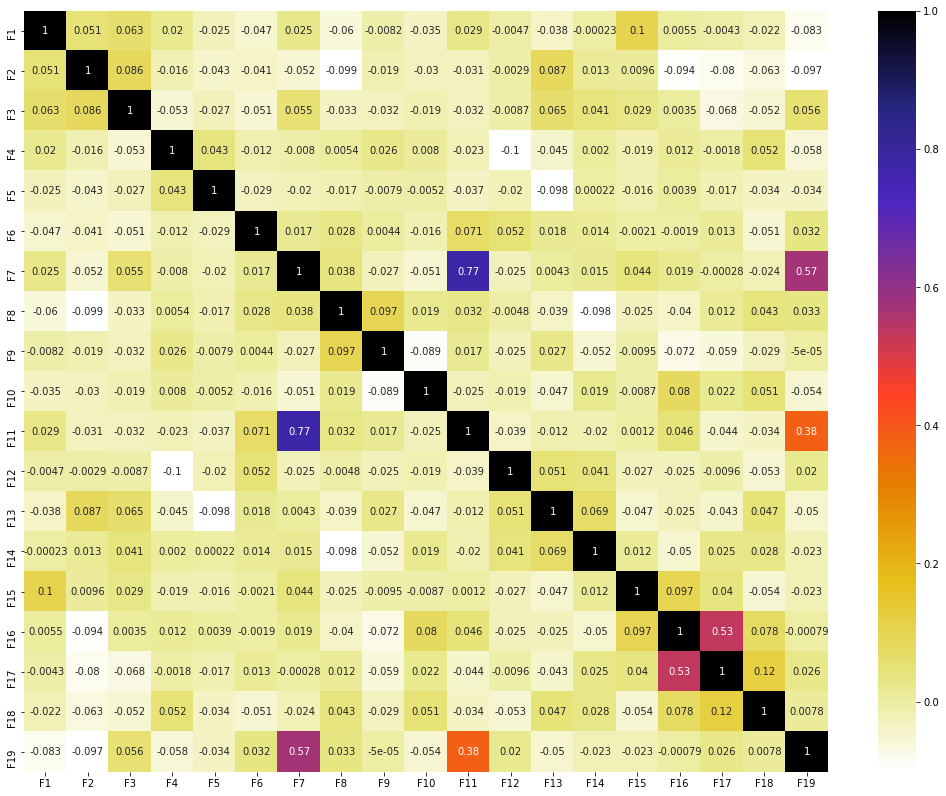

In [3]:
import seaborn as sns
# Using Pearson Correlation.
plt.figure(figsize=(18,14))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [4]:
# The following function can select highly correlated features and will remove the first feature that is correlated with other features.
def correlation(dataset, threshold):
  col_corr = set()  # Set of all the names of correlated columns.
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i]  # Extract Column Names.
        col_corr.add(colname)
  return col_corr

In [5]:
corr_features = correlation(df, 0.5)
print(len(set(corr_features)))  # Total Correlated Features.

3


In [6]:
print(corr_features) # List of Correlated Features.

{'F17', 'F19', 'F11'}


In [7]:
new_df = df.drop(corr_features, axis=1) # Drop Correlated Features.
new_df.shape  # Shape of the new dataset.

(500, 16)